here we are going to convert the data into normal distributed 

**Step 1. First: Confirm Non-Normality (Don’t Assume)**

use histogram + KDE plot to check if data is normally distributed or not

also you can use Q-Q plot

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("C:\\Users\\123\\Desktop\\python project for data analitycs\\Data\\Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df = data.iloc[:,1:]

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


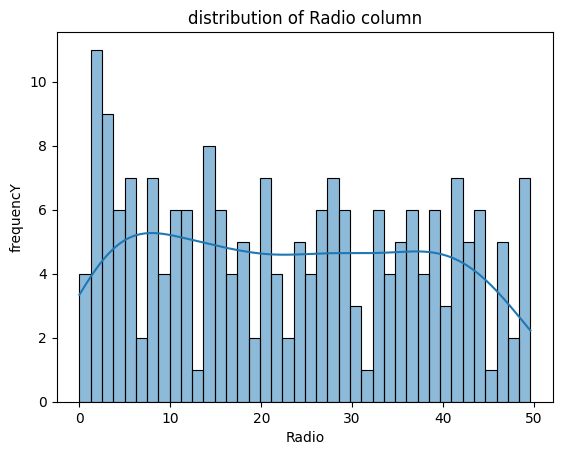

In [11]:
sns.histplot(df["Radio"],kde=True,bins=40)
plt.xlabel("Radio")
plt.ylabel("frequencY")
plt.title("distribution of Radio column")
plt.show()

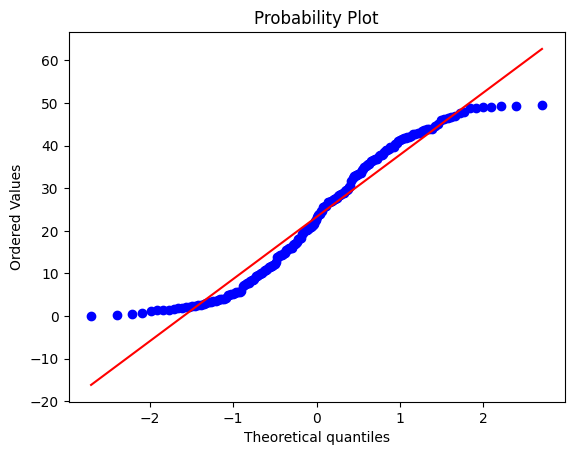

In [12]:
import scipy.stats as stats
stats.probplot(df['Radio'], plot=plt)
plt.show()

In [15]:
stats.normaltest(df['Radio'])

NormaltestResult(statistic=np.float64(131.96267892466238), pvalue=np.float64(2.2114053855837032e-29))

# Data Transformation

In [16]:
#log Transformation
price_log = np.log(df["Radio"] + 1)

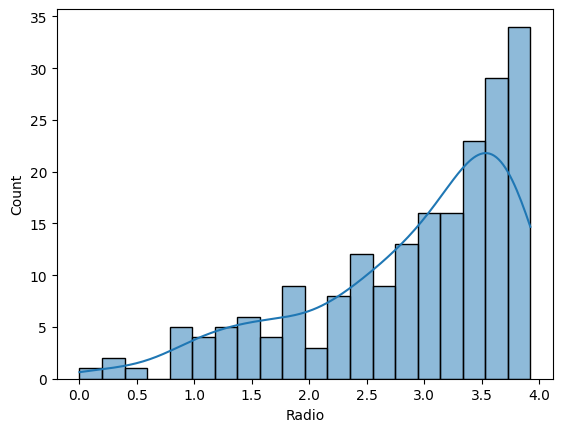

In [17]:
sns.histplot(price_log,bins=20,kde=True)
plt.show()

In [18]:
# Square Root transformation
radio_sqrt = np.sqrt(df["Radio"])

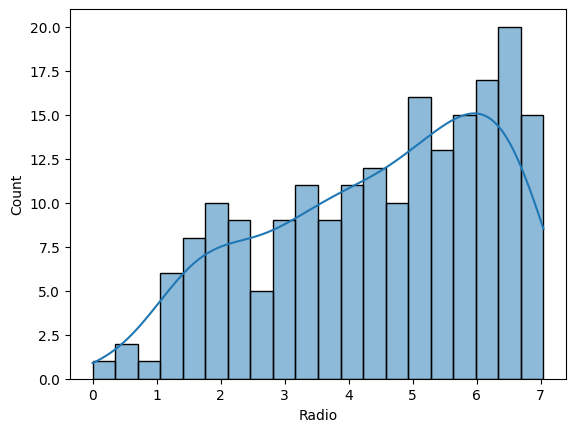

In [19]:
sns.histplot(radio_sqrt,kde=True,bins=20)
plt.show()

In [28]:
# Using IQR term

q1 = df["Radio"].quantile(0.25)
q3 = df["Radio"].quantile(0.75)
IQR = q3 - q1

temp = pd.DataFrame(df["Radio"])
print(temp.head())

new_data = temp[(temp["Radio"] >= q1 - 1.5*IQR) & (temp["Radio"] <= q3 + 1.5*IQR)]

   Radio
0   37.8
1   39.3
2   45.9
3   41.3
4   10.8


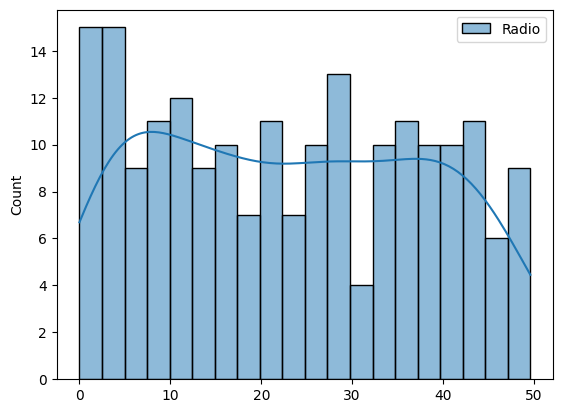

In [29]:
sns.histplot(new_data,bins=20,kde=True)
plt.show()

In [30]:
#YEO Johnson method

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
Temp_2 = pt.fit_transform(df[['Radio']])

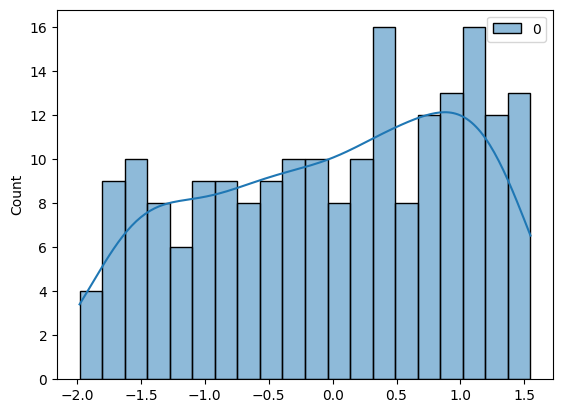

In [31]:
sns.histplot(Temp_2,bins=20,kde=True)
plt.show()